
# Project on Wine Quality

**Objective**

* Understand the Dataset & cleanup (if required).
* Build classification models to predict the wine quality.
* Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
data.shape

(1143, 13)

# Prepare

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

In [9]:
data.describe().style.background_gradient(cmap='YlGnBu')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# visualization

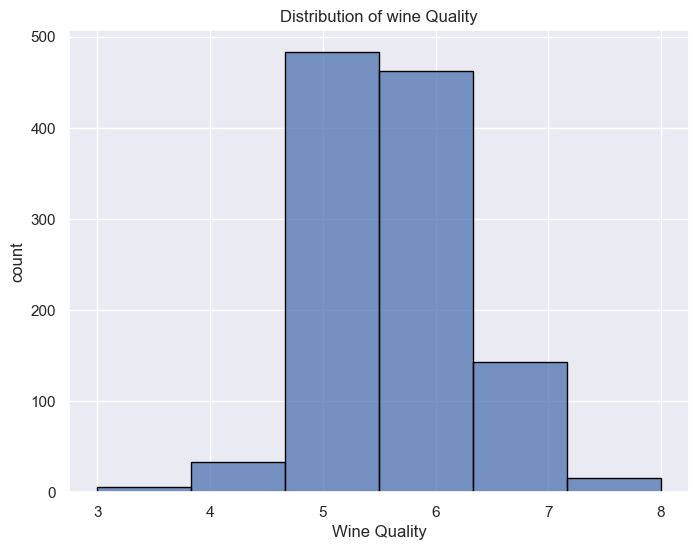

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['quality'],bins=6, edgecolor='black')
plt.xlabel('Wine Quality')
plt.ylabel('count')
plt.title('Distribution of wine Quality')
plt.show()

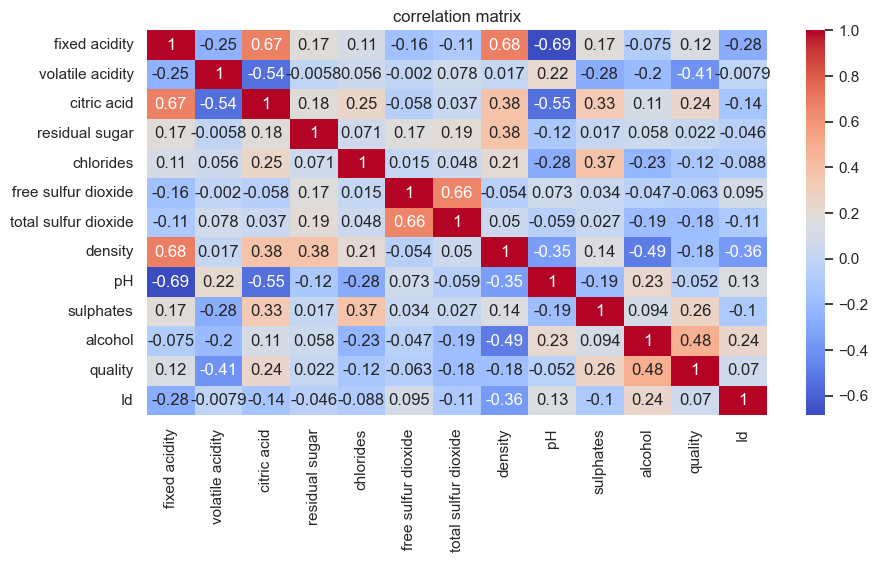

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

# Analyze

**train model**

In [11]:
X = data.drop('quality', axis=1)
y = data['quality']

In [13]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=.2, random_state=42)

In [14]:
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

**initialize and train the random forest classifier**

In [15]:
rand = RandomForestClassifier(n_estimators=100, random_state=42)
rand.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
y_pred = rand.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.6812227074235808

**visualization**

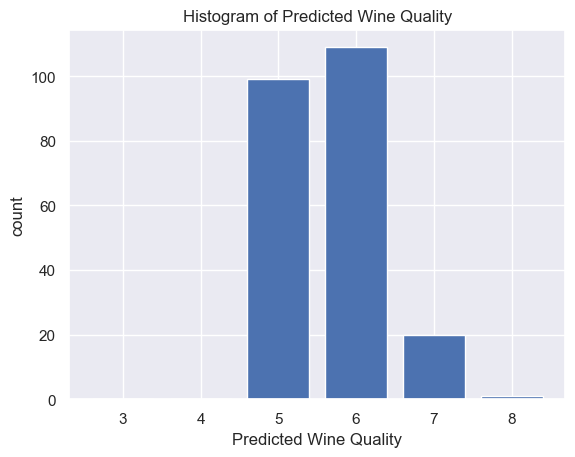

In [18]:
plt.hist(y_pred, bins=range(3, 10), align='left', rwidth=0.8)
plt.xlabel('Predicted Wine Quality')
plt.ylabel('count')
plt.title('Histogram of Predicted Wine Quality')
plt.show()

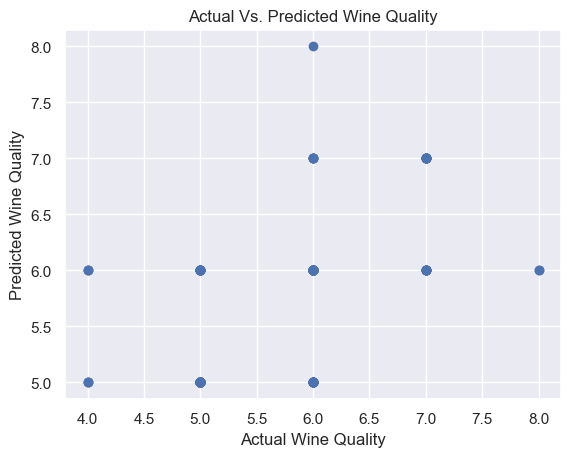

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('Actual Vs. Predicted Wine Quality')
plt.show()

In [20]:
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()

In [21]:
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'min_samples_split': [2, 4, 5],
                 'max_features': ['sqrt', 'log2']}


knn_param_grid = {'n_neighbors': [3, 5, 7],
                 'weights': ['uniform', 'distance']
                 }

svm_param_grid = {'C': [0.1, 1, 10],
                 'gamma': ['scale', 'auto']}

**perform hyperarameter turning and evaluation for each model**

In [22]:
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, scoring='accuracy', cv=5)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [23]:
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, scoring='accuracy', cv=5)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [24]:
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, scoring='accuracy', n_jobs=-1, cv=5)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
             scoring='accuracy')

**select the best hyperparameters**

In [25]:
best_rf_model = rf_grid_search.best_estimator_
best_knn_model = knn_grid_search.best_estimator_
best_svm_model = svm_grid_search.best_estimator_

**test the model**

In [26]:
rf_predictions = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [27]:
knn_predictions = best_knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

In [28]:
svm_predictions = best_svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [29]:
model_result = pd.DataFrame({'models':['Random Forest', 'KNN', 'SVC'],
                             'Accuracy_score': [rf_accuracy, knn_accuracy, svm_accuracy]})
model_result

,models,Accuracy_score
0,Random Forest,0.681223
1,KNN,0.602620
2,SVC,0.585153


In [39]:
model_result = pd.DataFrame({'models':['Random Forest', 'KNN', 'SVC'],
                             'Accuracy_score': [rf_accuracy, knn_accuracy, svm_accuracy]})
ax = model_result

<Figure size 500x500 with 0 Axes>

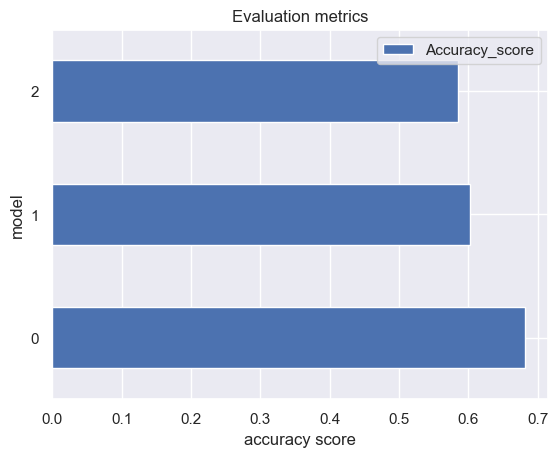

In [40]:
plt.figure(figsize=(5, 5))
ax.plot.barh()
plt.xlabel('accuracy score')
plt.ylabel('model')
plt.title('Evaluation metrics')
plt.show()

# Report

In [34]:
#Build classification models to predict the wine quality
accuracy_score(y_test, y_pred)

0.6812227074235808

In [35]:
#compare the evaluation metrics of various classification algorithms
model_result

,models,Accuracy_score
0,Random Forest,0.681223
1,KNN,0.602620
2,SVC,0.585153


**Visualization**

<Figure size 500x500 with 0 Axes>

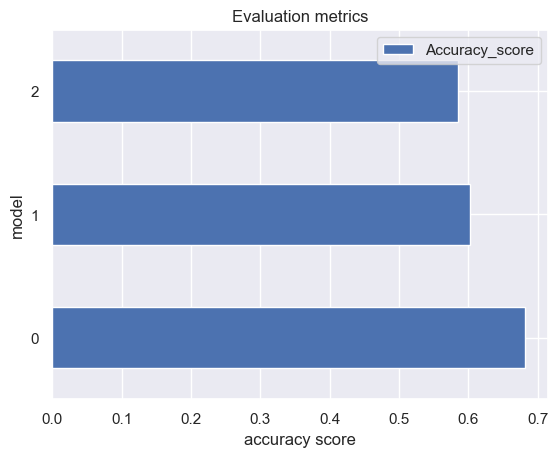

In [36]:
#bar chart to compare the evaluation metrics of various classification algorithms
plt.figure(figsize=(5, 5))
ax.plot.barh()
plt.xlabel('accuracy score')
plt.ylabel('model')
plt.title('Evaluation metrics')
plt.show()